<a href="https://colab.research.google.com/github/saadatialirezam-create/glaucoma-detection/blob/main/04_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Mount Drive

In [2]:
drive.mount('/content/drive')
PRED_DIR1 = "/content/drive/MyDrive/Glaucoma_data/preds"
PRED_DIR2 = "/content/drive/MyDrive/Glaucoma_data_preds"

Mounted at /content/drive


## Load Predictions

In [3]:
y_true   = np.load(f"{PRED_DIR1}/y_true.npy")

res_pred = np.load(f"{PRED_DIR1}/resnet50_pred.npy")
vgg_pred = np.load(f"{PRED_DIR2}/vgg16_pred.npy")
rf_pred  = np.load(f"{PRED_DIR1}/rf_pred.npy")

print("Shapes:")
print("y_true:", y_true.shape)
print("ResNet:", res_pred.shape)
print("VGG   :", vgg_pred.shape)
print("RF    :", rf_pred.shape)

Shapes:
y_true: (475,)
ResNet: (475,)
VGG   : (475,)
RF    : (475,)


## Majority Voting (2 out of 3)

In [4]:
votes = res_pred + vgg_pred + rf_pred
ensemble_pred_hard = (votes >= 2).astype(np.int64)

## Metrics

In [5]:
acc = accuracy_score(y_true, ensemble_pred_hard)
prec = precision_score(y_true, ensemble_pred_hard, zero_division=0)
rec = recall_score(y_true, ensemble_pred_hard, zero_division=0)
f1 = f1_score(y_true, ensemble_pred_hard, zero_division=0)
cm1 = confusion_matrix(y_true, ensemble_pred_hard)

print("\n--- Ensemble (Majority Voting) ---")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("Confusion Matrix:\n", cm1)


--- Ensemble (Majority Voting) ---
Accuracy : 0.7789473684210526
Precision: 0.875
Recall   : 0.4745762711864407
F1-score : 0.6153846153846154
Confusion Matrix:
 [[286  12]
 [ 93  84]]


## Confusion Matrix for Majority Voting

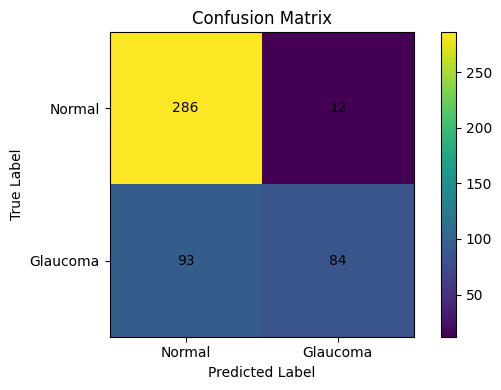

In [6]:
import matplotlib.pyplot as plt

classes = ["Normal", "Glaucoma"]

plt.figure(figsize=(6,4))
plt.imshow(cm1, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm1.max() / 2
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        plt.text(j, i, format(cm1[i, j], "d"),
                 ha="center", va="center", color="black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

## Soft Voting

In [7]:
res_prob = np.load(f"{PRED_DIR1}/resnet50_prob.npy")
vgg_prob = np.load(f"{PRED_DIR2}/vgg16_prob.npy")
rf_prob  = np.load(f"{PRED_DIR1}/rf_prob.npy")

avg_prob = (res_prob + vgg_prob + rf_prob) / 3
ensemble_pred_soft = (avg_prob >= 0.5).astype(np.int64)

## Metrics

In [9]:
acc = accuracy_score(y_true, ensemble_pred_soft)
prec = precision_score(y_true, ensemble_pred_soft, zero_division=0)
rec = recall_score(y_true, ensemble_pred_soft, zero_division=0)
f1 = f1_score(y_true, ensemble_pred_soft, zero_division=0)
cm2 = confusion_matrix(y_true, ensemble_pred_soft)

print("\n--- Ensemble (Soft Voting) ---")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("Confusion Matrix:\n", cm2)


--- Ensemble (Soft Voting) ---
Accuracy : 0.7936842105263158
Precision: 0.9072164948453608
Recall   : 0.4971751412429379
F1-score : 0.6423357664233577
Confusion Matrix:
 [[289   9]
 [ 89  88]]


## Confusion Matrix for Soft Voting

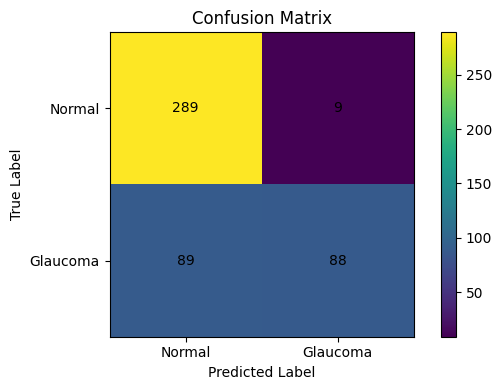

In [10]:
classes = ["Normal", "Glaucoma"]

plt.figure(figsize=(6,4))
plt.imshow(cm2, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm2.max() / 2
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        plt.text(j, i, format(cm2[i, j], "d"),
                 ha="center", va="center", color="black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()